<a href="https://colab.research.google.com/github/VishakBharadwaj94/CIFAR_10_Tensorflow/blob/master/CIFAR10_with_Pure_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#download the data
!wget http://pjreddie.com/media/files/cifar.tgz
!tar xzf cifar.tgz

URL transformed to HTTPS due to an HSTS policy
--2019-12-17 16:49:58--  https://pjreddie.com/media/files/cifar.tgz
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168584360 (161M) [application/octet-stream]
Saving to: ‘cifar.tgz.1’

cifar.tgz.1          81%[===============>    ] 130.71M  1.23MB/s    eta 8s     ^C


In [0]:
from pathlib import Path 
path = Path('./cifar')

In [0]:
from bs import random_mini_batches

In [0]:
from PIL import Image
import numpy as np
import os

def load_dataset(path=path):
  with open(path/'labels.txt','r') as f:
    labels = f.read().split()
  
  label_mapping = dict(zip(labels, list(range(len(labels)))))
  files = os.listdir(path/'train')
  files = [os.path.join(path/'train',x) for x in files]
  
  x_train_orig = np.array([np.array(Image.open(file)) for file in files])
  y_train_orig = np.array([label_mapping[files[idx].split('_')[-1].split('.')[0]] for idx in range(len(files))])

  x_test_orig = np.array([np.array(Image.open(file)) for file in files])
  y_test_orig = np.array([label_mapping[files[idx].split('_')[-1].split('.')[0]] for idx in range(len(files))])
  
  y_train_orig = y_train_orig.reshape((1, y_train_orig.shape[0])).T
  y_test_orig = y_test_orig.reshape((1, y_test_orig.shape[0])).T

  return x_train_orig,y_train_orig.T,x_test_orig,y_test_orig,labels
    

In [0]:
x_train_orig,y_train_orig,x_test_orig,y_test_orig,classes=load_dataset()

In [6]:
print(x_train_orig.shape)
print(y_train_orig.shape)
print(x_test_orig.shape)
print(y_test_orig.shape)

(50000, 32, 32, 3)
(1, 50000)
(50000, 32, 32, 3)
(50000, 1)


In [0]:
def convert_to_one_hot(Y, C):
    Y = np.eye(C)[Y.reshape(-1)].T
    return Y

In [8]:
# Flatten the training and test images

x_train_flatten = x_train_orig.reshape(x_train_orig.shape[0], -1).T
x_test_flatten = x_test_orig.reshape(x_test_orig.shape[0], -1).T

# Normalize image vectors

x_train = x_train_flatten/255.
x_test = x_test_flatten/255.

# Convert training and test labels to one hot matrices

y_train = convert_to_one_hot(y_train_orig, 10)
y_test = convert_to_one_hot(y_test_orig, 10)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3072, 50000)
(10, 50000)
(3072, 50000)
(10, 50000)


In [0]:
import tensorflow as tf

In [0]:
def cost(logits,labels):

  z = tf.placeholder(tf.float32,name='z')
  y = tf.placeholder(tf.float32,name='y')

  loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=y,logits=z)

  with tf.Session() as sess:

    loss = sess.run(loss,feed_dict={z:logits,y:labels})

  return loss

In [11]:
#test
import numpy as np

logits = np.array([0.2,0.4,0.7,0.9])

cost = cost(logits, np.array([0,0,1,1]))
print ("cost = " + str(cost))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
cost = [0.79813886 0.91301525 0.40318605 0.34115386]


In [0]:
#creating placeholders

def create_placeholders(n_x,n_y):
  X = tf.placeholder(tf.float32,name='X',shape=[n_x, None]) #n_x is number of pixels
  Y = tf.placeholder(tf.float32,name='Y',shape=[n_y, None]) #n_y is number of classes
  return X,Y


In [0]:
def initialize_parameters():

  #initializing  3 linear layers with biases

    W1 = tf.get_variable("W1", [25,3072], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
    b1 = tf.get_variable("b1", [25,1], initializer = tf.zeros_initializer())
    W2 = tf.get_variable("W2", [12,25], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
    b2 = tf.get_variable("b2", [12,1], initializer = tf.zeros_initializer())
    W3 = tf.get_variable("W3", [10,12], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
    b3 = tf.get_variable("b3", [10,1], initializer = tf.zeros_initializer())

    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2,
                  "W3": W3,
                  "b3": b3}
    
    return parameters

In [0]:
#forward prop

def forward_prop(parameters,X):

  # Get parameters 
  W1 = parameters['W1']
  b1 = parameters['b1']
  W2 = parameters['W2']
  b2 = parameters['b2']
  W3 = parameters['W3']
  b3 = parameters['b3']

  Z1 = tf.add(tf.matmul(W1,X),b1)
  A1 = tf.nn.relu(Z1)
  Z2 = tf.add(tf.matmul(W2,A1),b2)
  A2 = tf.nn.relu(Z2)
  Z3 = tf.add(tf.matmul(W3,A2),b3)
  
  return Z3

In [0]:
def compute_cost(Z3,Y):
  logits = tf.transpose(Z3)
  labels = tf.transpose(Y)

  cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits =logits, labels = labels))

  return cost


In [0]:
import matplotlib.pyplot as plt 
from tensorflow.python.framework import ops

def model(x_train,y_train,x_test,y_test,epochs=200,lr=0.001,bs=32):

    ops.reset_default_graph()
    (n_x, m) = x_train.shape                          # n_x : input size, m :number of examples
    n_y = y_train.shape[0]                            # n_y : output size
    costs = []                                        
    
    # Create Placeholders of shape (n_x, n_y)

    X, Y = create_placeholders(n_x, n_y)

    # Initialize parameters

    parameters = initialize_parameters()
    
    # Forward propagation: Build the forward propagation in the tensorflow graph
    
    Z3 = forward_prop(parameters,X)
    
    # Cost function

    cost = compute_cost(Z3, Y)

    
    # optimizer for Backprop
    
    optimizer = tf.train.AdamOptimizer(learning_rate=lr).minimize(cost)

    
    # Initialize all the variables

    init = tf.global_variables_initializer()

    with tf.Session() as sess:
        sess.run(init)
        
        # training loop
        for epoch in range(epochs):

            epoch_cost = 0.                       
            num_minibatches = int(m / bs) # number of minibatches 
            minibatches = random_mini_batches(x_train, y_train, bs)

            for minibatch in minibatches:

                
                (minibatch_X, minibatch_Y) = minibatch
                _ , minibatch_cost = sess.run([optimizer, cost], feed_dict={X: minibatch_X, Y: minibatch_Y})
                epoch_cost += minibatch_cost / num_minibatches

            # Print the cost every epoch
            if epoch % 100 == 0:
                print (f"Cost after epoch {epoch}: {epoch_cost}")
            if epoch % 5 == 0:
                costs.append(epoch_cost)
                
        # plot the cost
        plt.plot(np.squeeze(costs))
        plt.ylabel('cost')
        plt.xlabel('iterations (per tens)')
        plt.title("Learning rate =" + str(lr))
        plt.show()

        # lets save the parameters in a variable
        parameters = sess.run(parameters)
        print("Parameters have been trained")

        # Calculate the correct predictions
        correct_prediction = tf.equal(tf.argmax(Z3), tf.argmax(Y))

        # Calculate accuracy on the test set
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

        print("Train Accuracy:", accuracy.eval({X: x_train, Y: y_train}))
        print("Test Accuracy:", accuracy.eval({X: x_test, Y: y_test}))
        
        return parameters

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

Cost after epoch 0: 1.963295632303143
Cost after epoch 100: 1.6435213910174884


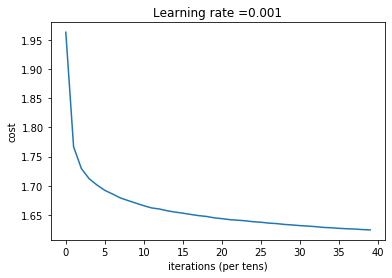

Parameters have been trained
Train Accuracy: 0.41536
Test Accuracy: 0.41536


In [17]:
parameters = model(x_train, y_train, x_test, y_test)